## 2767 - Machine Learning - 2425_T3
### Assignement 2 - SmartRetail Customer Shopping 

#### Student: Marco Piccolo - 63996

Importing Libraries

In [1]:
# Popular Data Handling Libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib.colors as mcolors

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Clustering Algorithms
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, FunctionTransformer
from pandas.api.types import CategoricalDtype

# Model Evaluation & Metrics
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc, f1_score,
    precision_recall_curve, recall_score, precision_score, accuracy_score,
    roc_auc_score, silhouette_score, adjusted_rand_score, mean_squared_error
)

# Model Selection & Hyperparameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Recommendation System & Similarity Measures
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix


Loading the dataset

In [2]:
df_original = pd.read_csv('SmartRetail_dataset.csv')
df_original.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


#### Data Overview

In [3]:
df_original.shape

(3900, 18)

In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
df_original.duplicated().sum()

0

In [6]:
df_original.describe().round(2)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00,3900.00
mean,1950.50,44.07,59.76,3.75,25.35
std,1125.98,15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,1950.50,44.00,60.00,3.70,25.00
75%,2925.25,57.00,81.00,4.40,38.00
max,3900.00,70.00,100.00,5.00,50.00


##### Continuous Variables

In [7]:
columns = []

for column in df_original.columns:
    if df_original[column].dtype != 'object' and column != 'Customer ID':
        columns.append(column)

if columns:
    df_stat_met = df_original[columns].agg(['count', 'mean', 'median', 'var', 'std', 'min', 'max']).T
    df_stat_met = df_stat_met.round(2) 
    df_stat_met_display = df_stat_met.style.format("{:,.2f}")
else:
    df_stat_met = pd.DataFrame()
    df_stat_met_display = df_stat_met

df_stat_met_display


,count,mean,median,var,std,min,max
Age,"3,900.00",44.07,44.00,231.27,15.21,18.00,70.00
Purchase Amount (USD),"3,900.00",59.76,60.00,561.00,23.69,20.00,100.00
Review Rating,"3,900.00",3.75,3.70,0.51,0.72,2.50,5.00
Previous Purchases,"3,900.00",25.35,25.00,208.72,14.45,1.00,50.00


- The average customer age is 44 years old. The youngest customer is 18, and the oldest is 70.
- The average purchase amount is $59.76.
- The average rating is 3.75 out of a maximum of 5.
- On average, customers make 25 purchases at SmartRetail, with the most loyal customers having made up to 50 purchases.

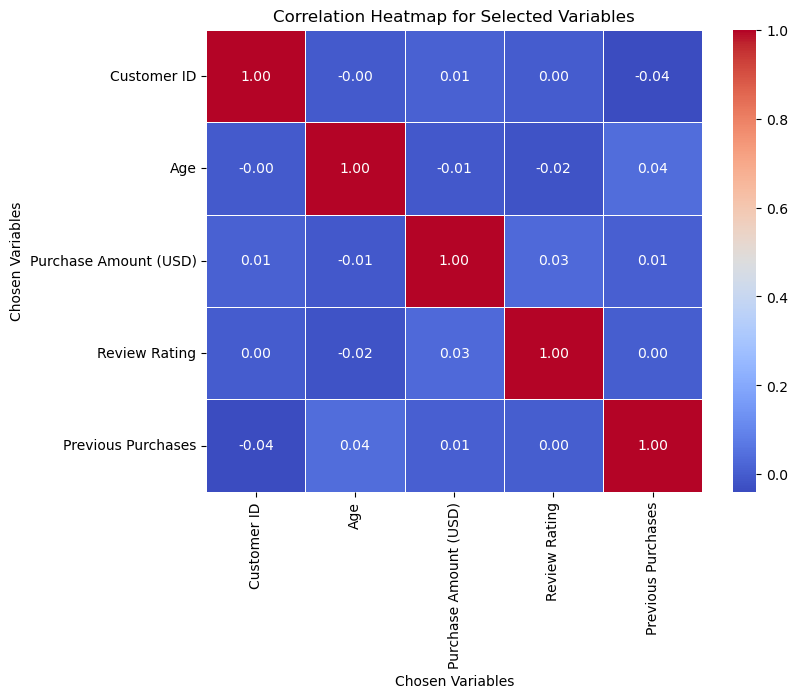

In [8]:
continuous_var = ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Compute correlation matrix only for selected variables
correlation_matrix = df_original[continuous_var].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

# Titles and labels
plt.title("Correlation Heatmap for Selected Variables")
plt.xlabel("Chosen Variables")
plt.ylabel("Chosen Variables")

# Show plot
plt.show()

##### Non-Continuous Variables

In [9]:
for column in df_original:
    if df_original[column].dtype == object:
        print(f'{column}: {"-"*(30-len(column))} {df_original[column].unique()}')
    else:
        pass

Gender: ------------------------ ['Male' 'Female']
Item Purchased: ---------------- ['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']
Category: ---------------------- ['Clothing' 'Footwear' 'Outerwear' 'Accessories']
Location: ---------------------- ['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Mi

- Pair Plot

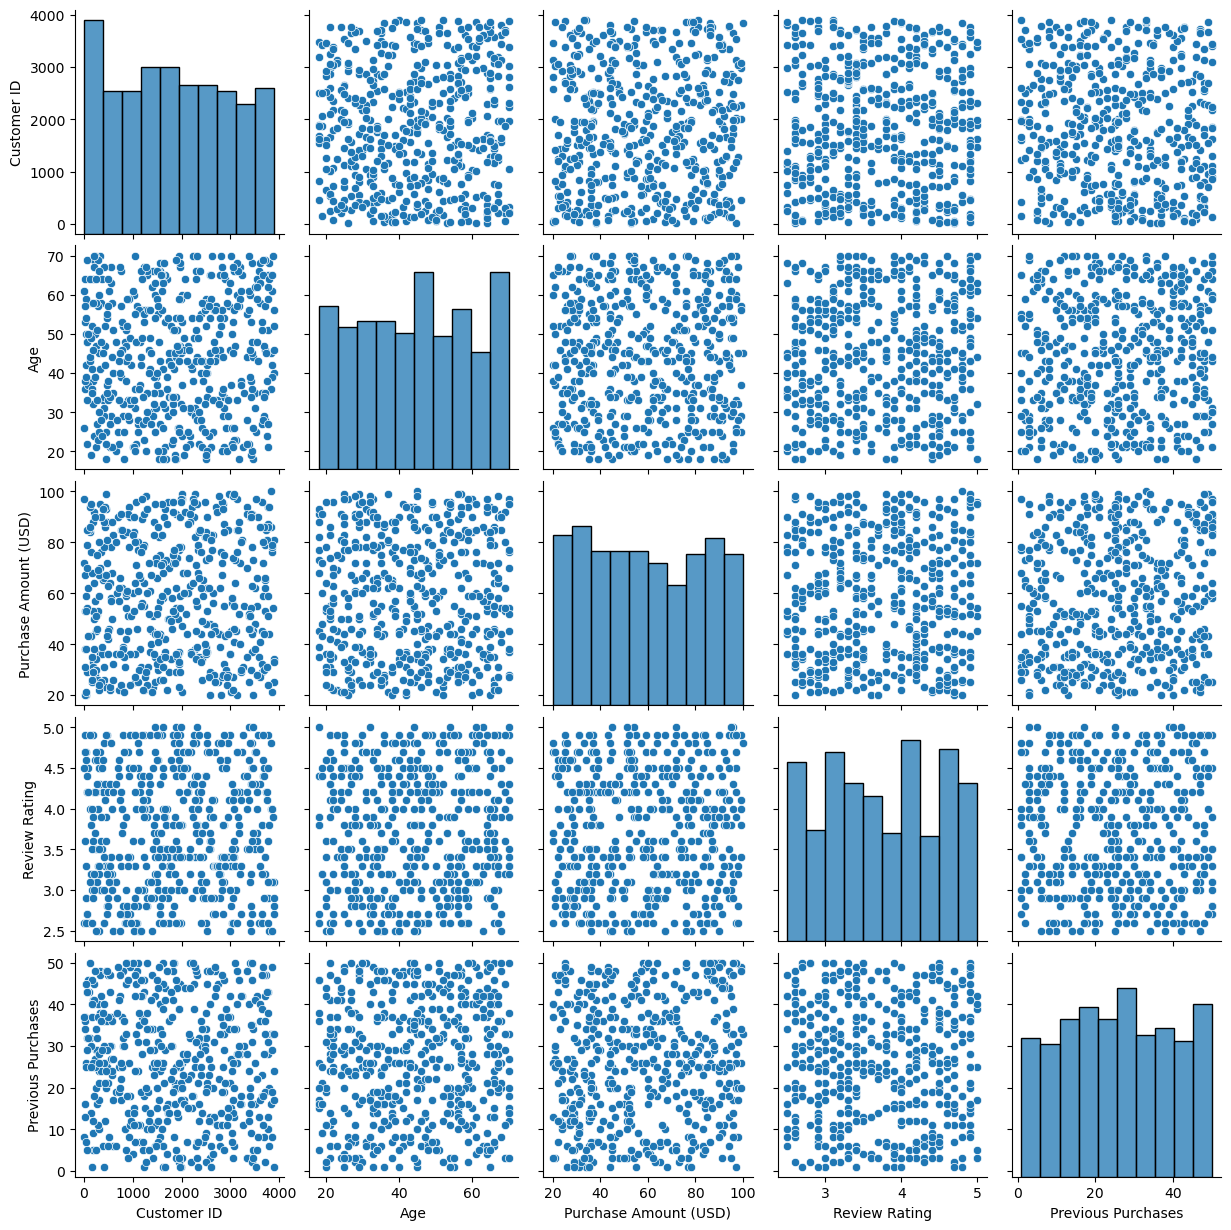

In [10]:
# Understand feature relationships using pair plots (numeric subset and sampling for speed)
numeric_cols = df_original.select_dtypes(include=[np.number]).columns.tolist()
plot_df = df_original[numeric_cols]
if len(plot_df) > 500:
    plot_df = plot_df.sample(500, random_state=42)
sns.pairplot(plot_df)
plt.show()


- Encoding and Correlation

In [11]:
df_correlation = df_original.copy()

In [12]:
df_correlation["Promo Code Used"] = df_correlation["Promo Code Used"].map({"Yes": 1, "No": 0})
df_correlation["Gender"] = df_correlation["Gender"].map({"Male": 1, "Female": 0})
df_correlation["Subscription Status"] = df_correlation["Subscription Status"].map({"Yes": 1, "No": 0})
df_correlation["Discount Applied"] = df_correlation["Discount Applied"].map({"Yes": 1, "No": 0})

df_correlation.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,1,1,14,Venmo,Fortnightly
1,2,19,1,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,1,1,2,Cash,Fortnightly
2,3,50,1,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,1,1,23,Credit Card,Weekly
3,4,21,1,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,1,1,49,PayPal,Weekly
4,5,45,1,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,1,1,31,PayPal,Annually


In [13]:
# Identify categorical columns with more than two unique values
multi_class_cols = [col for col in df_correlation.select_dtypes(include=['object']).columns if df_correlation[col].nunique() > 2]

# Apply Label Encoding
for col in multi_class_cols:
    le = LabelEncoder()
    df_correlation[col] = le.fit_transform(df_correlation[col])

# Check results
df_correlation.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,2,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,3,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
3,4,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
4,5,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0


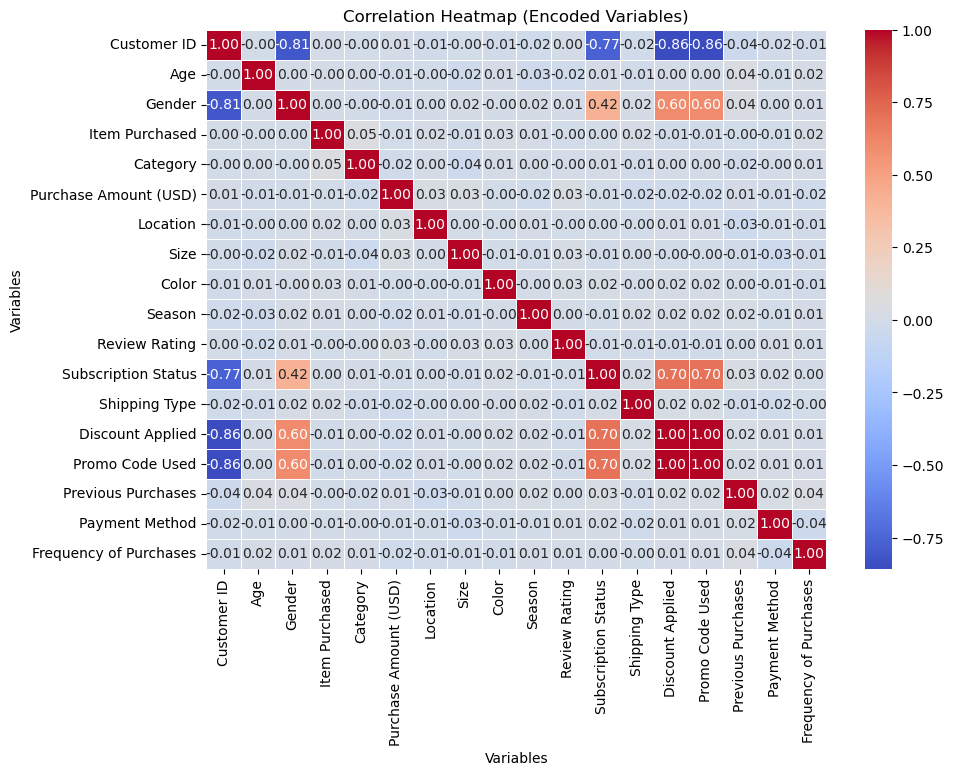

In [14]:
correlation = df_correlation.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

# Titles and labels
plt.title("Correlation Heatmap (Encoded Variables)")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Show plot
plt.show()

##### Frequencies

- Gender

Absolute Frequency:
Gender
Male      2652
Female    1248
Name: count, dtype: int64

Relative Frequency:
Gender
Male      0.68
Female    0.32
Name: proportion, dtype: float64


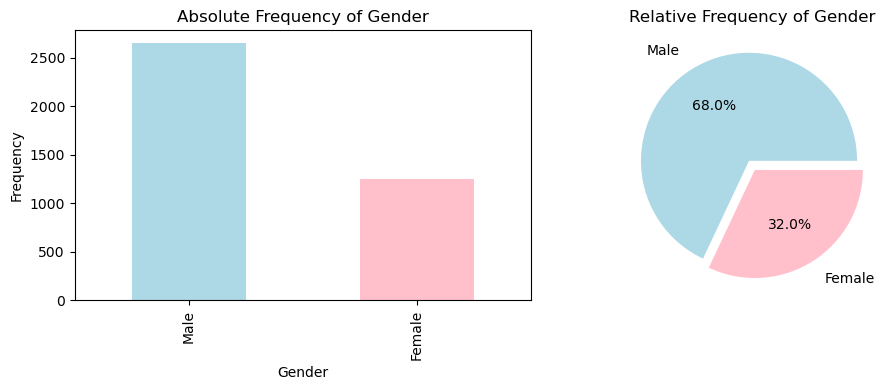

In [15]:
# Absolute Frequency
abs_freq = df_original['Gender'].value_counts()
print("Absolute Frequency:")
print(abs_freq)

# Relative Frequency
rel_freq = df_original['Gender'].value_counts(normalize=True)
print("\nRelative Frequency:")
print(rel_freq)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Create a list of colors based on gender: blue for Male, pink for Female
colors = ['lightblue' if gender == 'Male' else 'pink' for gender in abs_freq.index]

explode = [0.05] * len(rel_freq)

# Bar Chart for the Absolute Frequency
abs_freq.plot(kind='bar', ax=axes[0], color=colors)
axes[0].set_title('Absolute Frequency of Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')

# Pie Chart for the Relative Frequency
rel_freq.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], labeldistance=1.2, explode=explode, colors=colors)
axes[1].set_title('Relative Frequency of Gender')
axes[1].set_ylabel('')  # Hides the y-label for a cleaner look

plt.tight_layout()
plt.show()

- Category

Category 

Absolute Frequency:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


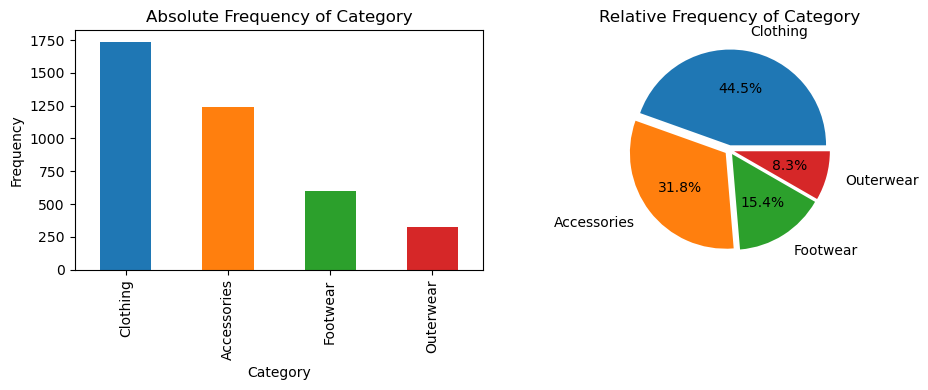

In [16]:
def plot_category_frequencies(df, column_name):
    """
    Plots the absolute and relative frequency of a categorical column in a dataframe.
    
    Parameters:
    df (pd.DataFrame): The input dataframe.
    column_name (str): The name of the categorical column to analyze.
    """
    print(column_name,'\n')

    # Absolute Frequency
    abs_freq = df[column_name].value_counts()
    print("Absolute Frequency:")
    print(abs_freq)
    
    # Relative Frequency
    rel_freq = df[column_name].value_counts(normalize=True)
    
    # Create subplots with 1 row and 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    explode = [0.05] * len(rel_freq)
    
    # Bar Chart for the Absolute Frequency
    default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    abs_freq.plot(kind='bar', ax=axes[0], color=default_colors[:len(abs_freq)])
    axes[0].set_title(f'Absolute Frequency of {column_name}')
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Frequency')
    
    # Pie Chart for the Relative Frequency
    rel_freq.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], labeldistance=1.2, explode=explode)
    axes[1].set_title(f'Relative Frequency of {column_name}')
    axes[1].set_ylabel('')  # Hides the y-label for a cleaner look
    
    plt.tight_layout()
    plt.show()

plot_category_frequencies(df_original, 'Category')

Season 

Absolute Frequency:
Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64


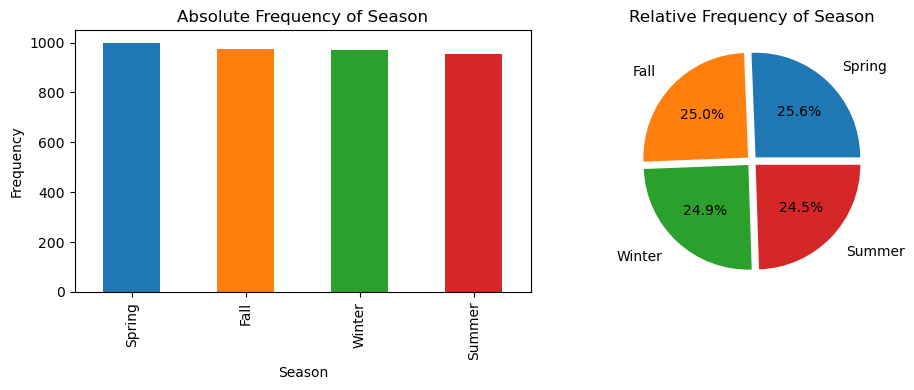

Subscription Status 

Absolute Frequency:
Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64


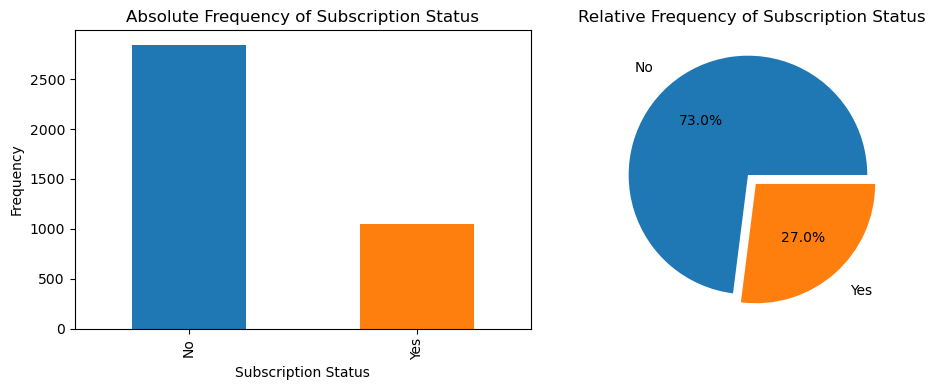

Shipping Type 

Absolute Frequency:
Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64


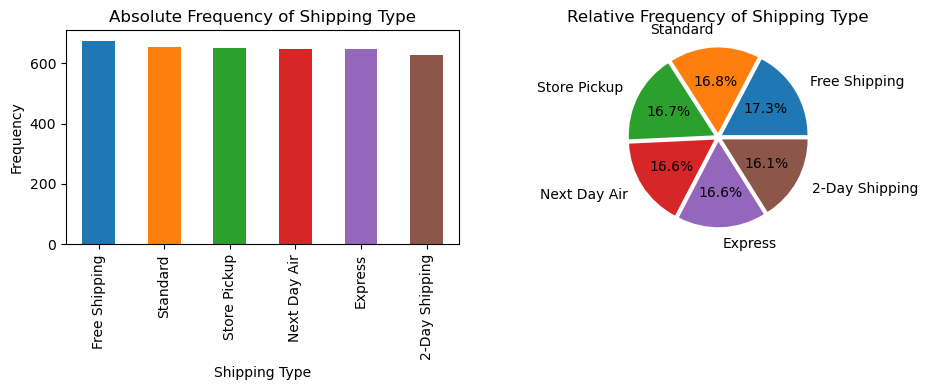

Discount Applied 

Absolute Frequency:
Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64


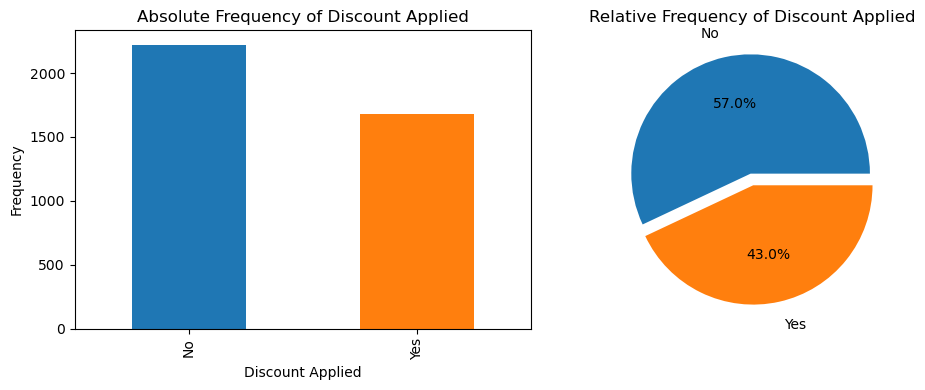

Frequency of Purchases 

Absolute Frequency:
Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64


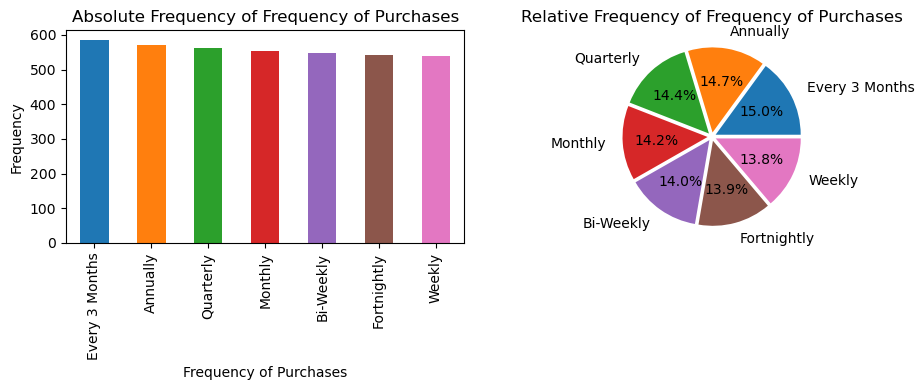

In [17]:
# Season
plot_category_frequencies(df_original, 'Season')

# Subscription Status
plot_category_frequencies(df_original, 'Subscription Status')

# Shipping Type
plot_category_frequencies(df_original, 'Shipping Type')

# Discount Applied
plot_category_frequencies(df_original, 'Discount Applied')

# Frequency of Purchases
plot_category_frequencies(df_original, 'Frequency of Purchases')

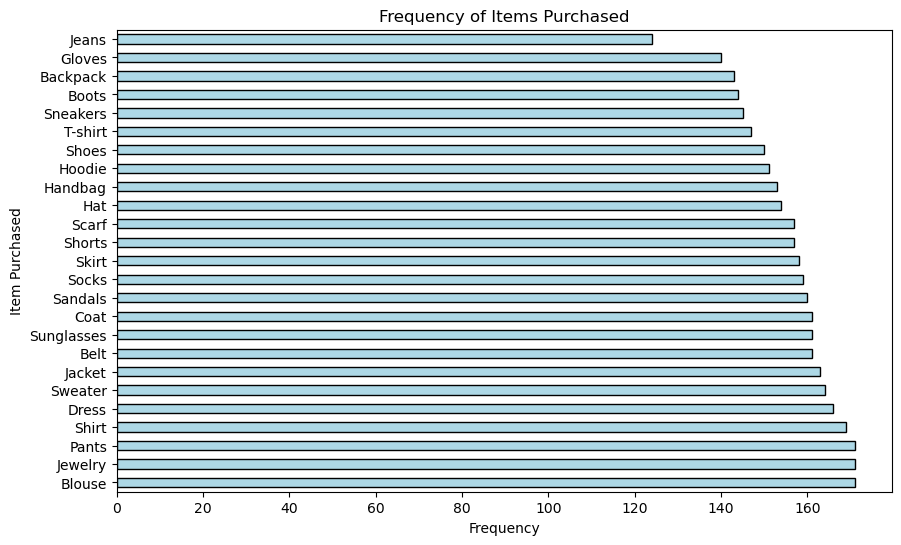

In [18]:
item_counts = df_original["Item Purchased"].value_counts()

plt.figure(figsize=(10, 6))
item_counts.plot(kind='barh', color = 'lightblue', edgecolor = 'black')
plt.xlabel('Frequency')
plt.ylabel('Item Purchased')
plt.title('Frequency of Items Purchased')
plt.show()

- 3 most commonly purchased items

In [19]:
most_common_item = df_original['Item Purchased'].mode()
most_common_item

0     Blouse
1    Jewelry
2      Pants
Name: Item Purchased, dtype: object

- Location

In [20]:
df_original["Location"].unique()

array(['Kentucky', 'Maine', 'Massachusetts', 'Rhode Island', 'Oregon',
       'Wyoming', 'Montana', 'Louisiana', 'West Virginia', 'Missouri',
       'Arkansas', 'Hawaii', 'Delaware', 'New Hampshire', 'New York',
       'Alabama', 'Mississippi', 'North Carolina', 'California',
       'Oklahoma', 'Florida', 'Texas', 'Nevada', 'Kansas', 'Colorado',
       'North Dakota', 'Illinois', 'Indiana', 'Arizona', 'Alaska',
       'Tennessee', 'Ohio', 'New Jersey', 'Maryland', 'Vermont',
       'New Mexico', 'South Carolina', 'Idaho', 'Pennsylvania',
       'Connecticut', 'Utah', 'Virginia', 'Georgia', 'Nebraska', 'Iowa',
       'South Dakota', 'Minnesota', 'Washington', 'Wisconsin', 'Michigan'],
      dtype=object)

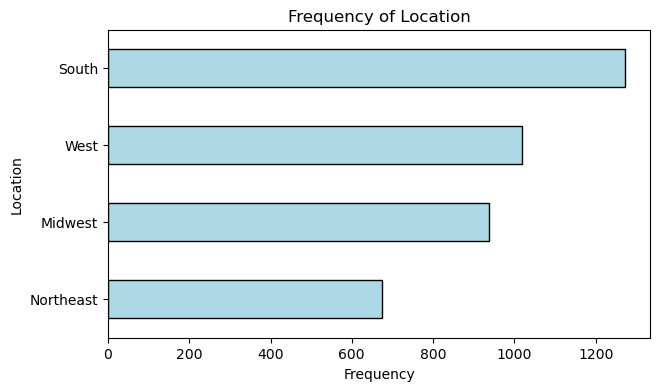

In [21]:
# Define the US Census region mapping
region_mapping = {
    "Northeast": [
        "Connecticut", "Maine", "Massachusetts", "New Hampshire",
        "New Jersey", "New York", "Pennsylvania", "Rhode Island", "Vermont"
    ],
    "Midwest": [
        "Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota",
        "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin"
    ],
    "South": [
        "Alabama", "Arkansas", "Delaware", "Florida", "Georgia", "Kentucky",
        "Louisiana", "Maryland", "Mississippi", "North Carolina", "Oklahoma",
        "South Carolina", "Tennessee", "Virginia", "West Virginia", "Texas"
    ],
    "West": [
        "Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho",
        "Montana", "Nevada", "New Mexico", "Oregon", "Utah", "Washington", "Wyoming"
    ]
}

# Create a dictionary that maps each state to its corresponding region
state_to_region = {state: region for region, states in region_mapping.items() for state in states}

# Add a new column 'Region' to df_original based on the 'State' column
df_original['Region'] = df_original['Location'].map(state_to_region)

region_counts = df_original["Region"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(7, 4))
region_counts.plot(kind='barh', color = 'lightblue', edgecolor = 'black')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title('Frequency of Location')
plt.show()

- Age

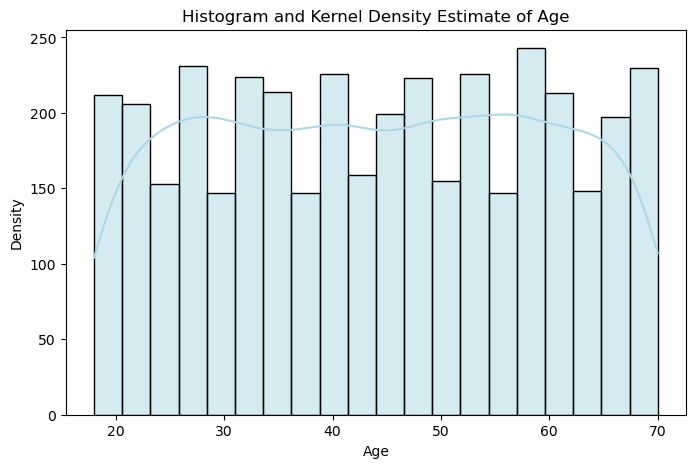

In [22]:
# Plot histogram with Kernel Density Estimate (KDE) line
plt.figure(figsize=(8, 5))
sns.histplot(df_original['Age'], kde=True, bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram and Kernel Density Estimate of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

- Average ratings per Age

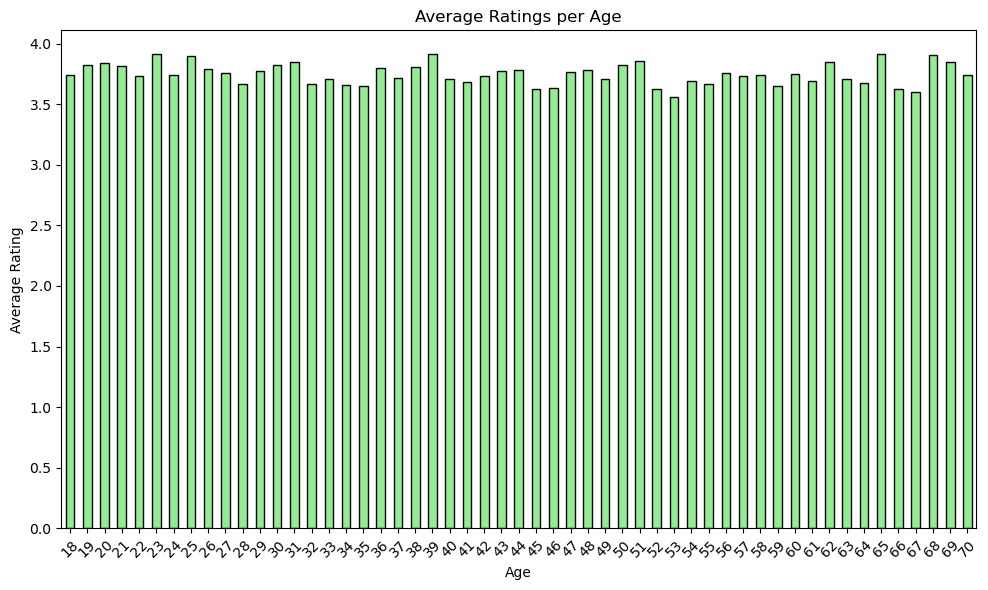

In [23]:
# Group by age and calculate the average rating for each age
avg_ratings_per_age = df_original.groupby('Age')['Review Rating'].mean().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
avg_ratings_per_age.plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Average Ratings per Age')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

- Average Purchase per Age

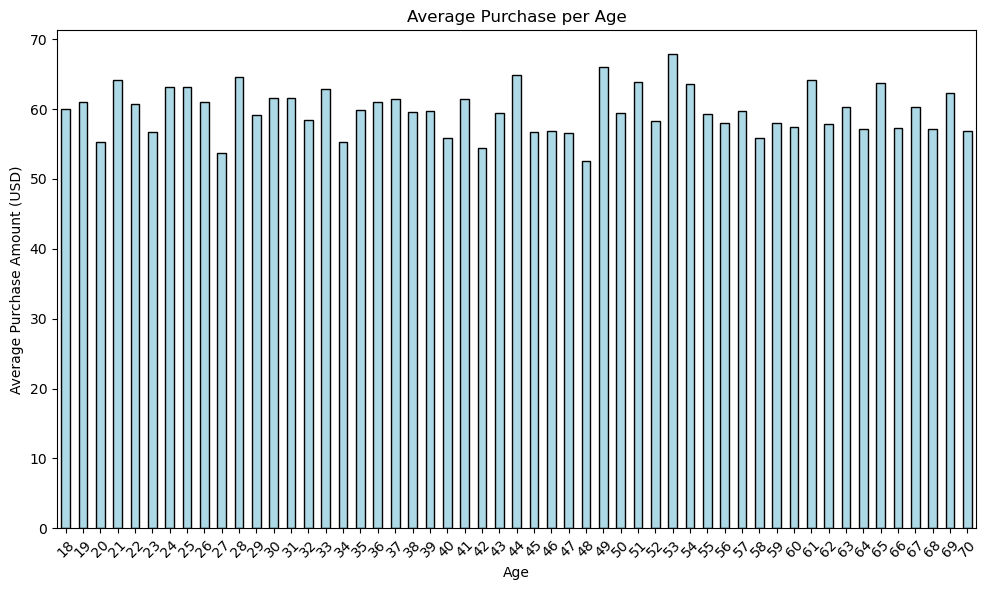

In [24]:
# Group by age and calculate the average purchase amount for each age
avg_purchase_per_age = df_original.groupby('Age')['Purchase Amount (USD)'].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_purchase_per_age.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Average Purchase per Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Original class counts:
Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64

Balanced class counts:
Subscription Status
Yes    1053
No     1053
Name: count, dtype: int64


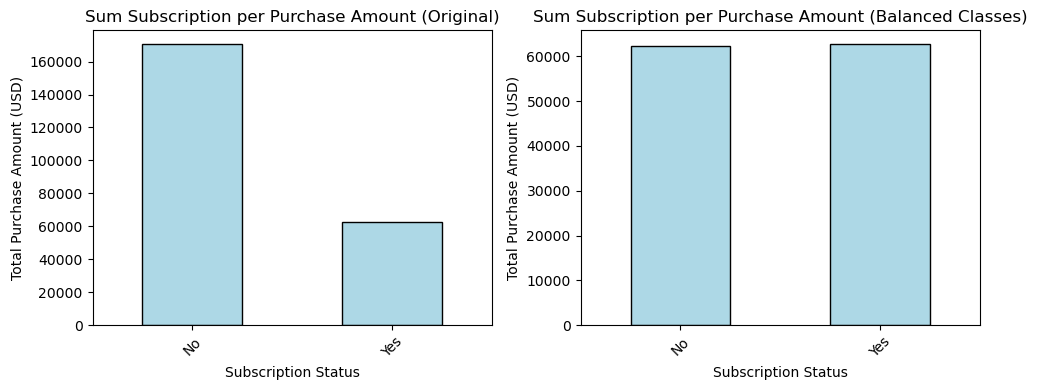

In [25]:
subscription_per_purchase_original = df_original.groupby('Subscription Status')['Purchase Amount (USD)'].sum()

# --- 2) Check class distribution and balance the classes ---
print("Original class counts:")
print(df_original["Subscription Status"].value_counts())

# Separate the classes
df_yes = df_original[df_original["Subscription Status"] == "Yes"]
df_no  = df_original[df_original["Subscription Status"] == "No"]

# Balance the classes by undersampling the majority class
if len(df_yes) < len(df_no):
    df_no_undersampled = df_no.sample(n=len(df_yes), random_state=42)
    df_balanced = pd.concat([df_yes, df_no_undersampled], ignore_index=True)
else:
    df_yes_undersampled = df_yes.sample(n=len(df_no), random_state=42)
    df_balanced = pd.concat([df_yes_undersampled, df_no], ignore_index=True)

print("\nBalanced class counts:")
print(df_balanced["Subscription Status"].value_counts())

# Group by Subscription Status on the balanced DataFrame
subscription_per_purchase_balanced = df_balanced.groupby("Subscription Status")["Purchase Amount (USD)"].sum()

# --- 3) Create subplots to display the two plots side by side ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot for Original Data
subscription_per_purchase_original.plot(kind="bar", color="lightblue", edgecolor="black", ax=axes[0])
axes[0].set_title('Sum Subscription per Purchase Amount (Original)')
axes[0].set_xlabel('Subscription Status')
axes[0].set_ylabel('Total Purchase Amount (USD)')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Balanced Data
subscription_per_purchase_balanced.plot(kind="bar", color="lightblue", edgecolor="black", ax=axes[1])
axes[1].set_title("Sum Subscription per Purchase Amount (Balanced Classes)")
axes[1].set_xlabel("Subscription Status")
axes[1].set_ylabel("Total Purchase Amount (USD)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Question 1
#### Provide three insights you extracted from the EDA analysis.

#### Insight 1
Only male customers have subscription plans; no female customer has one.


Gender per Subscription
Gender  Subscription Status
Female  No                     1248
Male    No                     1599
        Yes                    1053
Name: count, dtype: int64


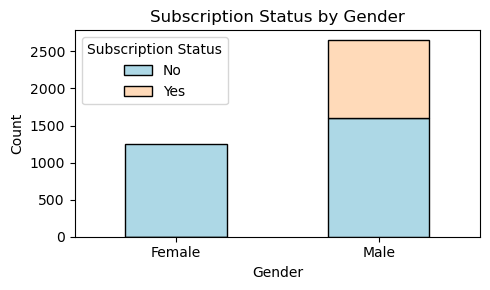

In [26]:
gender_per_subscription = df_original.groupby('Gender')['Subscription Status'].value_counts()

# 2) Print the results
print("\nGender per Subscription")
print(gender_per_subscription)

# 3) Unstack to get a DataFrame with columns ["No", "Yes"]
#    and fill missing values with 0 if needed
gender_per_subscription_df = (
    gender_per_subscription
    .unstack(fill_value=0)
    .reindex(columns=["No", "Yes"])  # Ensure consistent column order
)

# 4) Plot a stacked bar chart
ax = gender_per_subscription_df.plot(
    kind='bar',
    stacked=True,
    figsize=(5, 3),
    color=['lightblue', 'peachpuff'],  # Adjust colors to your preference
    edgecolor='black'
)

# 5) Customize the plot
plt.title("Subscription Status by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep Gender labels horizontal
plt.legend(title="Subscription Status")  # Legend title
plt.tight_layout()

# 6) Show the plot
plt.show()

#### Insight 2
Only male customers applied discounts. This suggests that discounts are highly correlated with subscription status.


Gender per Subscription
Gender  Discount Applied
Female  No                  1248
Male    Yes                 1677
        No                   975
Name: count, dtype: int64


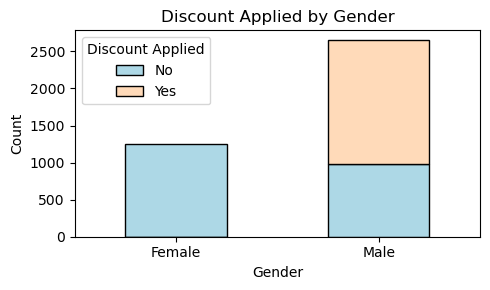

In [27]:
gender_per_discount = df_original.groupby('Gender')['Discount Applied'].value_counts()

# 2) Print the results
print("\nGender per Subscription")
print(gender_per_discount)


gender_per_discount_df = (
    gender_per_discount
    .unstack(fill_value=0)
    .reindex(columns=["No", "Yes"])  # Ensure consistent column order
)

# 4) Plot a stacked bar chart
ax = gender_per_discount_df.plot(
    kind='bar',
    stacked=True,
    figsize=(5, 3),
    color=['lightblue', 'peachpuff'],  # Adjust colors to your preference
    edgecolor='black'
)

# 5) Customize the plot
plt.title("Discount Applied by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep Gender labels horizontal
plt.legend(title="Discount Applied")  # Legend title
plt.tight_layout()

# 6) Show the plot
plt.show()

In [28]:
count_customerid_per_rating = df_original.groupby('Customer ID')['Review Rating'].sum().sort_values()
count_customerid_per_rating

Customer ID
821     2.5
3302    2.5
611     2.5
768     2.5
2009    2.5
       ... 
3647    5.0
2257    5.0
2292    5.0
1821    5.0
2435    5.0
Name: Review Rating, Length: 3900, dtype: float64

#### Insight 3
Customers from US South region are almost double from Customers from Northeast region.

Region
Northeast     674
Midwest       937
West         1018
South        1271
Name: count, dtype: int64


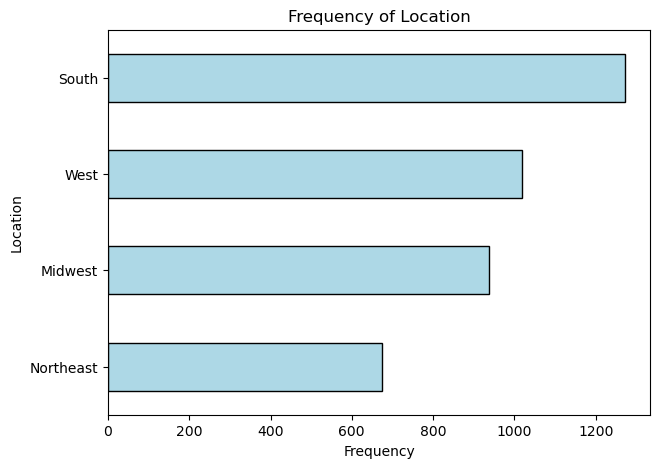

In [29]:
# Define the US Census region mapping
region_mapping = {
    "Northeast": [
        "Connecticut", "Maine", "Massachusetts", "New Hampshire",
        "New Jersey", "New York", "Pennsylvania", "Rhode Island", "Vermont"
    ],
    "Midwest": [
        "Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota",
        "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin"
    ],
    "South": [
        "Alabama", "Arkansas", "Delaware", "Florida", "Georgia", "Kentucky",
        "Louisiana", "Maryland", "Mississippi", "North Carolina", "Oklahoma",
        "South Carolina", "Tennessee", "Virginia", "West Virginia", "Texas"
    ],
    "West": [
        "Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho",
        "Montana", "Nevada", "New Mexico", "Oregon", "Utah", "Washington", "Wyoming"
    ]
}

# Create a dictionary that maps each state to its corresponding region
state_to_region = {state: region for region, states in region_mapping.items() for state in states}

# Add a new column 'Region' to df_original based on the 'State' column
df_original['Region'] = df_original['Location'].map(state_to_region)


region_counts = df_original["Region"].value_counts().sort_values(ascending=True)

print(region_counts)

plt.figure(figsize=(7, 5))
region_counts.plot(kind='barh', color = 'lightblue', edgecolor = 'black')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title('Frequency of Location')
plt.show()

### Question 2
#### Please provide the number of customers segments.

K-Means Silhouette Score: 0.4138
Number of Clusters: 4
               Age  Purchase Amount (USD)
Cluster                                  
0        56.957992              80.872951
1        31.325797              39.386434
2        30.323347              79.972107
3        57.419125              39.077314


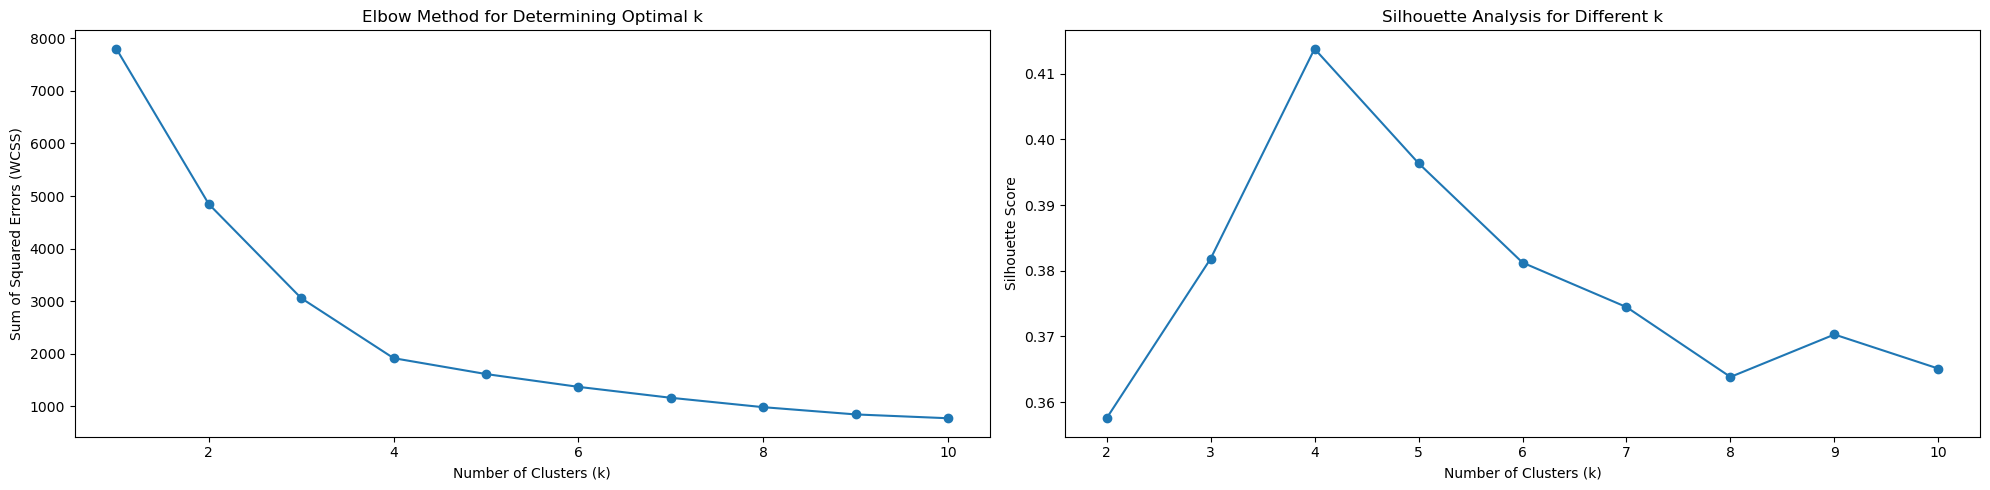

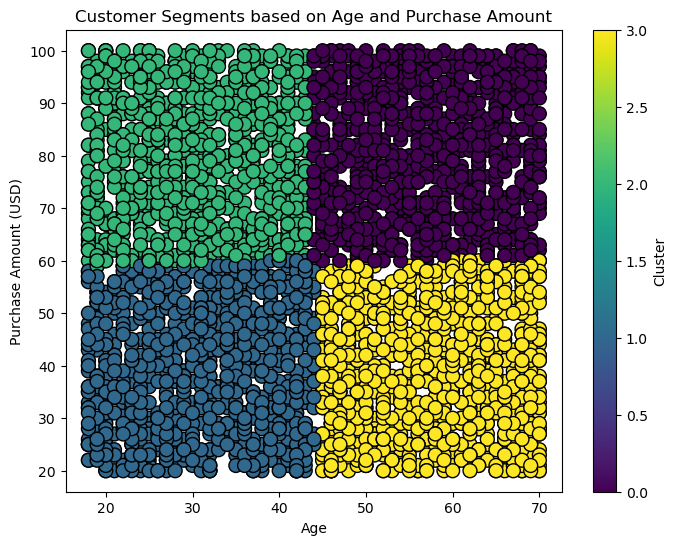

In [30]:
df_cluster = df_original.copy()

# 2) Select Relevant Features
features = ['Age', 'Purchase Amount (USD)']
X = df_cluster[features].copy()

# 3) Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4) Elbow Method & Silhouette Analysis (k=1..10)
wcss = []
silhouette_scores = []
cluster_range = range(1, 11)

for k in cluster_range:
    km = KMeans (n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

    # Silhouette is only valid for k >= 2
    if k > 1:
        score = silhouette_score(X_scaled, km.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)

# K-Means Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score:.4f}")
print(f"Number of Clusters: {4}")


# Assign final clusters to DataFrame
df_cluster['Cluster'] = kmeans_labels

# Print the summary
cluster_summary = df_cluster.groupby('Cluster').agg({
    'Age': 'mean',
    'Purchase Amount (USD)': 'mean'
})
print(cluster_summary)

# 6) Plot Elbow & Silhouette
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Elbow Plot
axes[0].plot(cluster_range, wcss, marker='o')
axes[0].set_xlabel("Number of Clusters (k)")
axes[0].set_ylabel("Sum of Squared Errors (WCSS)")
axes[0].set_title("Elbow Method for Determining Optimal k")

# Silhouette Plot (k=2..10)
axes[1].plot(range(2, 11), silhouette_scores[1:], marker='o')
axes[1].set_xlabel("Number of Clusters (k)")
axes[1].set_ylabel("Silhouette Score")
axes[1].set_title("Silhouette Analysis for Different k")

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(
    df_cluster['Age'],
    df_cluster['Purchase Amount (USD)'],
    c=df_cluster['Cluster'],
    cmap='viridis',
    edgecolor='k',
    s=100
)
plt.title("Customer Segments based on Age and Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Purchase Amount (USD)")
plt.colorbar(label='Cluster')
plt.show()


#### Q2.1. Please provide the number of customers segments
By using the K-means method, I split the dataset in **4 clusters**

#### Q2.2. Are the customers segments well defined? How did you measure it?
Customer segements are well defined, as visible from the scatterplot.<br>
Optimal number of clusters has been defined thanks to elbow method and silhoutte score 

#### Q2.2. Interpret the customer segments
4 clusters have been clearly identified according to their amount spent and their age.<br>
- Cluster 1 -> avg. Age: 56.96 / avg. Amount spent (USD): 80.87
- Cluster 2 -> avg. Age: 31.32 / aveg. Amount spent (USD): 39.38
- Cluster 3 -> avg. Age: 30.32 / aveg. Amount spent (USD): 79.97
- Cluster 4 -> avg. Age: 57.41 / aveg. Amount spent (USD): 39.07

### Question 3
Customer retention remains a key challenge for SmartRetail. SmartRetail is concerned about customer retention. Instead of predicting churn, the company wants to be able to identify loyal customers who consistently shop and engage with the platform thought subscription. This will help enhance loyalty programs and retention strategies.

In [31]:
df_predict = df_original.copy()


# Encoding purchase frequencies
freq_mapping = {
    'Weekly': 7,
    'Fortnightly': 14,
    'Bi-Weekly': 14,
    'Monthly': 30,
    'Quarterly': 90,
    'Every 3 Months': 90,
    'Annually': 365
}
df_predict['FrequencyEncoded'] = df_predict['Frequency of Purchases'].map(freq_mapping)

# Define what is loayal
df_predict['Loyalty'] = ((df_predict['Subscription Status'] == 'Yes') &
                         (df_predict['FrequencyEncoded'] <= 30))

df_predict['Loyalty'].sum()

599

I defined loyal customers as:
- They have a sunscription (Subscription Status == 'Yes')
- They purchase at least monthly

There are 599 loyal customers.

In [32]:
# 2a) Define the US Census region mapping
region_mapping = {
    "Northeast": [
        "Connecticut", "Maine", "Massachusetts", "New Hampshire",
        "New Jersey", "New York", "Pennsylvania", "Rhode Island", "Vermont"
    ],
    "Midwest": [
        "Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota",
        "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin"
    ],
    "South": [
        "Alabama", "Arkansas", "Delaware", "Florida", "Georgia", "Kentucky",
        "Louisiana", "Maryland", "Mississippi", "North Carolina", "Oklahoma",
        "South Carolina", "Tennessee", "Virginia", "West Virginia", "Texas"
    ],
    "West": [
        "Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho",
        "Montana", "Nevada", "New Mexico", "Oregon", "Utah", "Washington", "Wyoming"
    ]
}

# Create a dictionary that maps each state to its corresponding region
state_to_region = {
    state: region 
    for region, states in region_mapping.items() 
    for state in states
}

# 2b) Add a new column 'Region' based on 'Location'
df_predict['Region'] = df_predict['Location'].map(state_to_region)



# 2d) Map "Category" to numeric scale
cat_mapping = {
    'Accessories': 1,
    'Clothing': 2,
    'Footwear': 3,
    'Outerwear': 4
}
df_predict['CategoryEncoded'] = df_predict['Category'].map(cat_mapping)

# 3) DROP UNUSED COLUMNS & ENCODE OTHERS

df_predict = df_predict.drop(columns=['Location',
                                      'FrequencyEncoded',
                                      'Discount Applied',
                                      'Customer ID',
                                      'Size',
                                      'Color',
                                      'Frequency of Purchases',
                                      'Subscription Status'])

# Encode Gender & Subscription Status
df_predict["Gender"] = df_predict["Gender"].map({"Male": 1, "Female": 0})
df_predict["Promo Code Used"] = df_predict["Promo Code Used"].map({"Yes": 1, "No": 0})
 
#df_predict["Subscription Status"] = df_predict["Subscription Status"].map({"Yes": 1, "No": 0})



# One-hot encode the 'Region' column
df_predict = pd.get_dummies(df_predict, columns=['Region','Item Purchased','Season', 'Shipping Type', 'Payment Method', 'Category'])



In [33]:
df_predict.dropna()

,Age,Gender,Purchase Amount (USD),Review Rating,Promo Code Used,Previous Purchases,Loyalty,CategoryEncoded,Region_Midwest,Region_Northeast,...,Payment Method_Bank Transfer,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear
0,55,1,53,3.1,1,14,True,2,False,False,...,False,False,False,False,False,True,False,True,False,False
1,19,1,64,3.1,1,2,True,2,False,True,...,False,True,False,False,False,False,False,True,False,False
2,50,1,73,3.1,1,23,True,2,False,True,...,False,False,True,False,False,False,False,True,False,False
3,21,1,90,3.5,1,49,True,3,False,True,...,False,False,False,False,True,False,False,False,True,False
4,45,1,49,2.7,1,31,False,2,False,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,0,28,4.2,0,32,False,2,False,False,...,False,False,False,False,False,True,False,True,False,False
3896,52,0,49,4.5,0,41,False,1,True,False,...,True,False,False,False,False,False,True,False,False,False
3897,46,0,33,2.9,0,24,False,1,False,True,...,False,False,False,False,False,True,True,False,False,False
3898,44,0,77,3.8,0,24,False,3,True,False,...,False,False,False,False,False,True,False,False,True,False


- Logistic Regression

Best parameters (original features): {'C': 1, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Best ROC AUC (original features): 0.83932666843498

Classification Report (Original Features, threshold=0.3):
              precision    recall  f1-score   support

       False       0.93      0.72      0.82       654
        True       0.34      0.74      0.47       126

    accuracy                           0.73       780
   macro avg       0.64      0.73      0.64       780
weighted avg       0.84      0.73      0.76       780



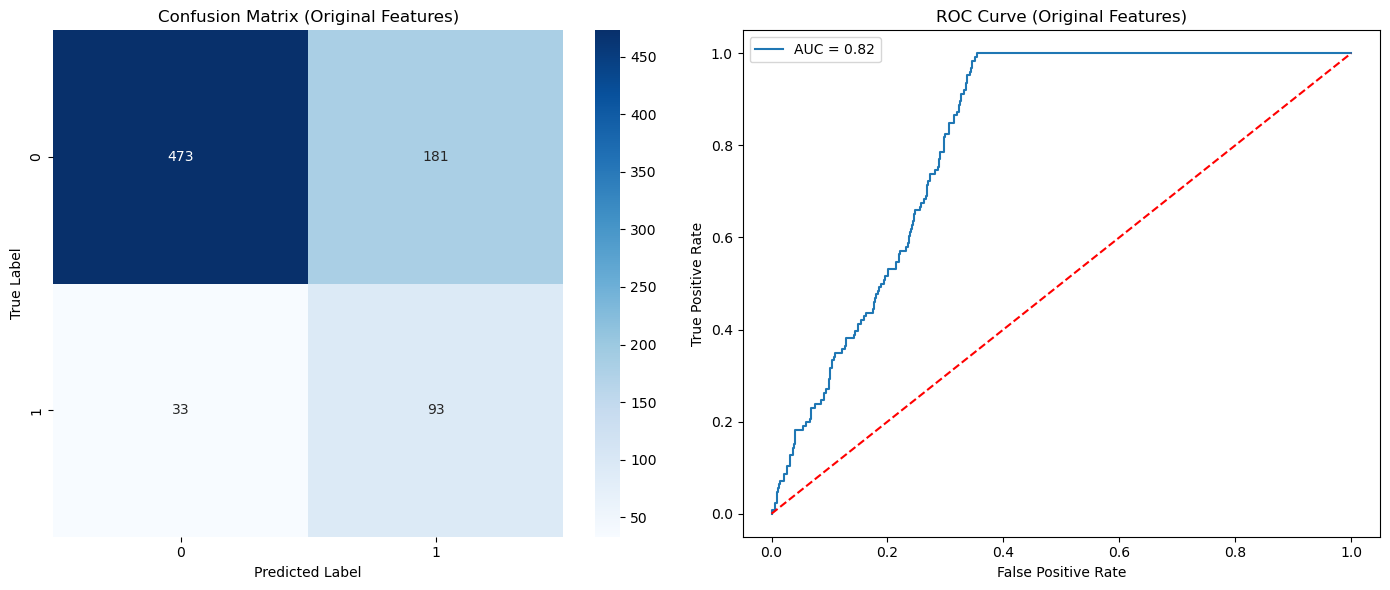

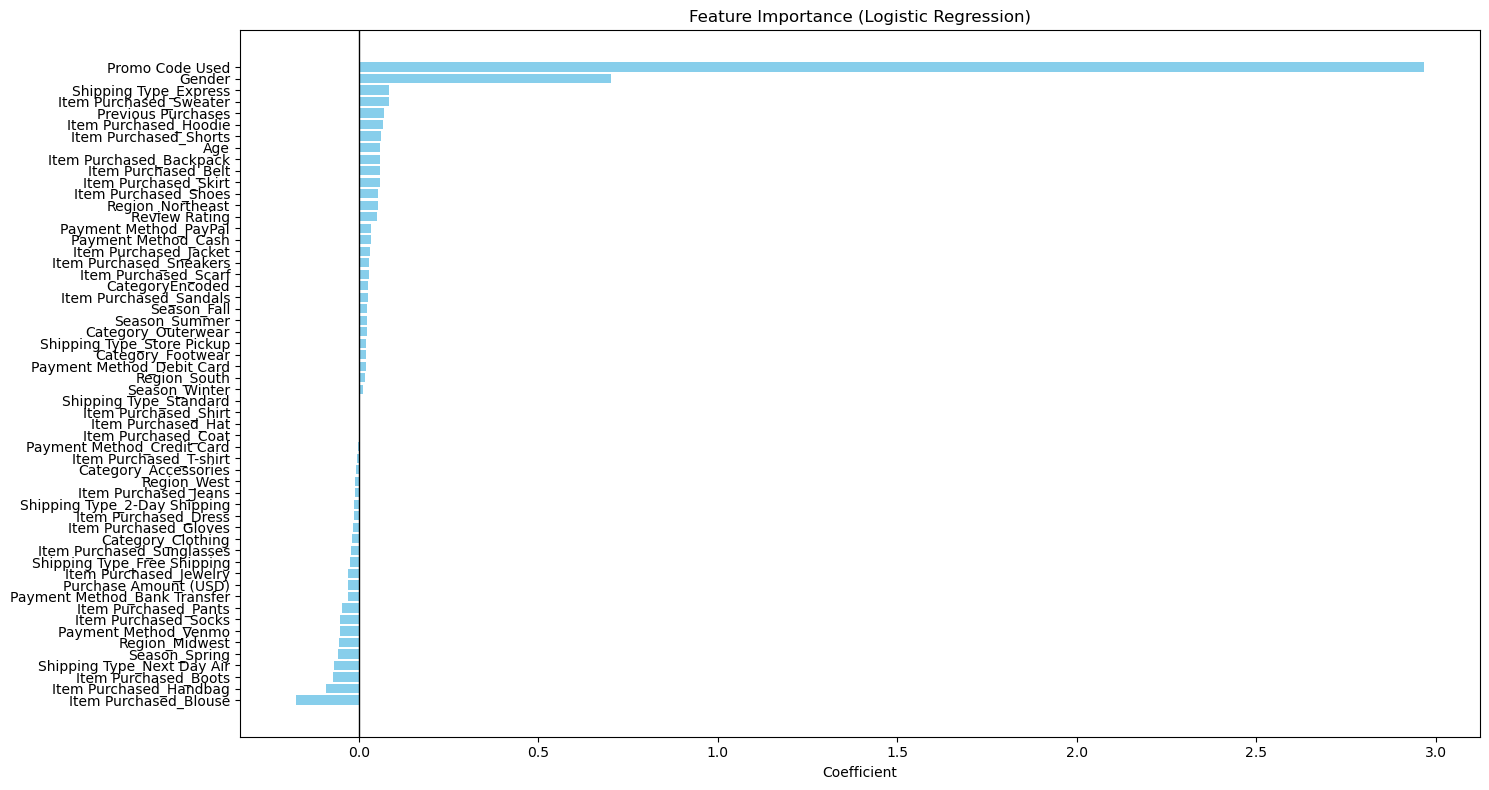

In [34]:
df_logistic = df_predict.copy()

# STEP 1: Split features and target
X = df_logistic.drop('Loyalty', axis=1)
y = df_logistic['Loyalty']

# STEP 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 3: Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# STEP 4: Grid Search with Logistic Regression (Original Features)
param_grid = [
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],  # Required for elasticnet
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 1.0],
        'C': [0.1, 1, 10],
        'class_weight': [None, 'balanced']
    },
    {
        'penalty': ['l2'],
        'solver': ['liblinear', 'saga'],
        'C': [0.01, 0.1, 1, 10],
        'class_weight': [None, 'balanced']
    }
]
log_reg = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display best parameters and performance for the original model
print("Best parameters (original features):", grid_search.best_params_)
print("Best ROC AUC (original features):", grid_search.best_score_)
log_reg_best = grid_search.best_estimator_

# Evaluate on the test set (using a custom threshold)
threshold = 0.3
y_probs = log_reg_best.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= threshold).astype(int)
print(f"\nClassification Report (Original Features, threshold={threshold}):")
print(classification_report(y_test, y_pred))

# STEP 7: Confusion Matrix & ROC Curve for the Original Model
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix (Original Features)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# Right plot: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
axes[1].plot([0, 1], [0, 1], linestyle='--', color='red')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve (Original Features)")
axes[1].legend()

plt.tight_layout()
plt.show()

# STEP 8: Feature Importance Bar Chart
feature_names = X.columns
coefficients = log_reg_best.coef_[0]

# Create a DataFrame for feature importance and sort by coefficient
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient')

# Plot a horizontal bar chart with the zero line in the middle
plt.figure(figsize=(15, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.axvline(0, color='black', linewidth=1)  # Zero line in the middle
plt.xlabel('Coefficient')
plt.title('Feature Importance (Logistic Regression)')
plt.tight_layout()
plt.show()


The logistic regression model correctly identifies about 74% of all loyal customers (recall = 0.74), but only around 34% of those it labels as “loyal” actually are (precision = 0.34), leading to substantial false alarms. Despite that limitation, it achieves a 73% overall accuracy and an ROC AUC of roughly 0.84, indicating decent separation between loyal and non‐loyal customers.<br>These results suggest the model is still a worthwhile starting point to shift from a blanket strategy to a more targeted one, thereby reducing some wasted marketing spend.

- Random Forest

Best parameters (Random Forest): {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best ROC AUC (Random Forest): 0.8474823973807449

Classification Report (Random Forest, threshold=0.3):
              precision    recall  f1-score   support

       False       1.00      0.65      0.78       654
        True       0.35      1.00      0.52       126

    accuracy                           0.70       780
   macro avg       0.68      0.82      0.65       780
weighted avg       0.90      0.70      0.74       780



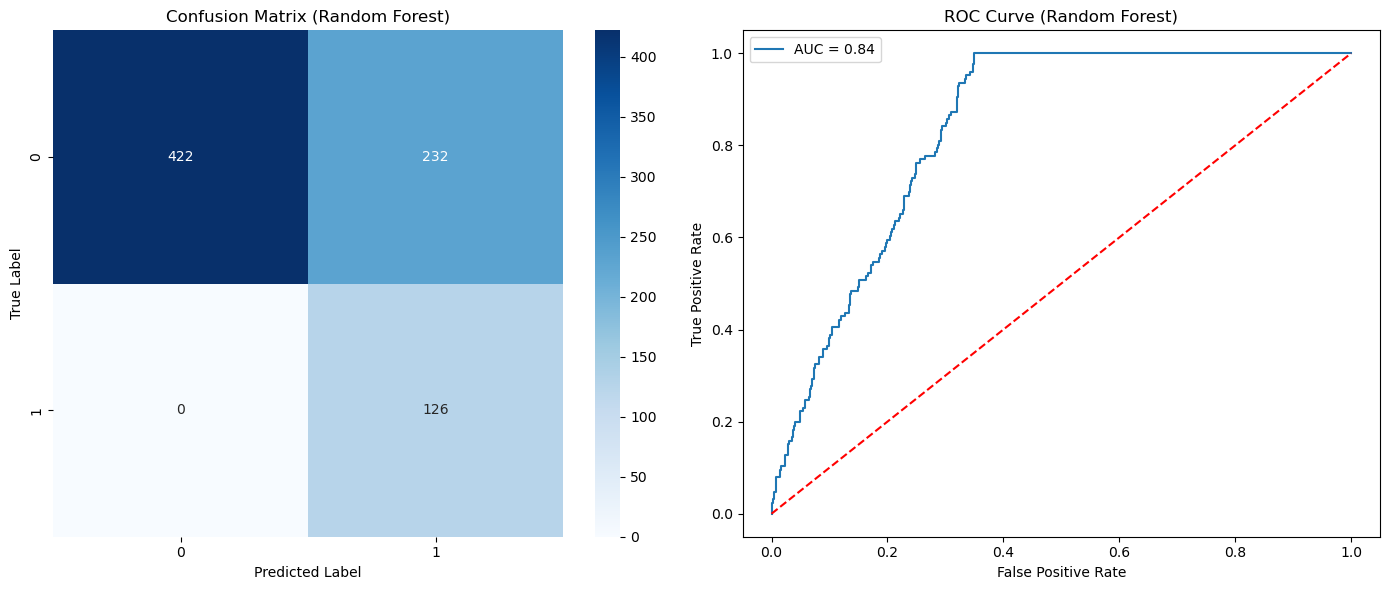

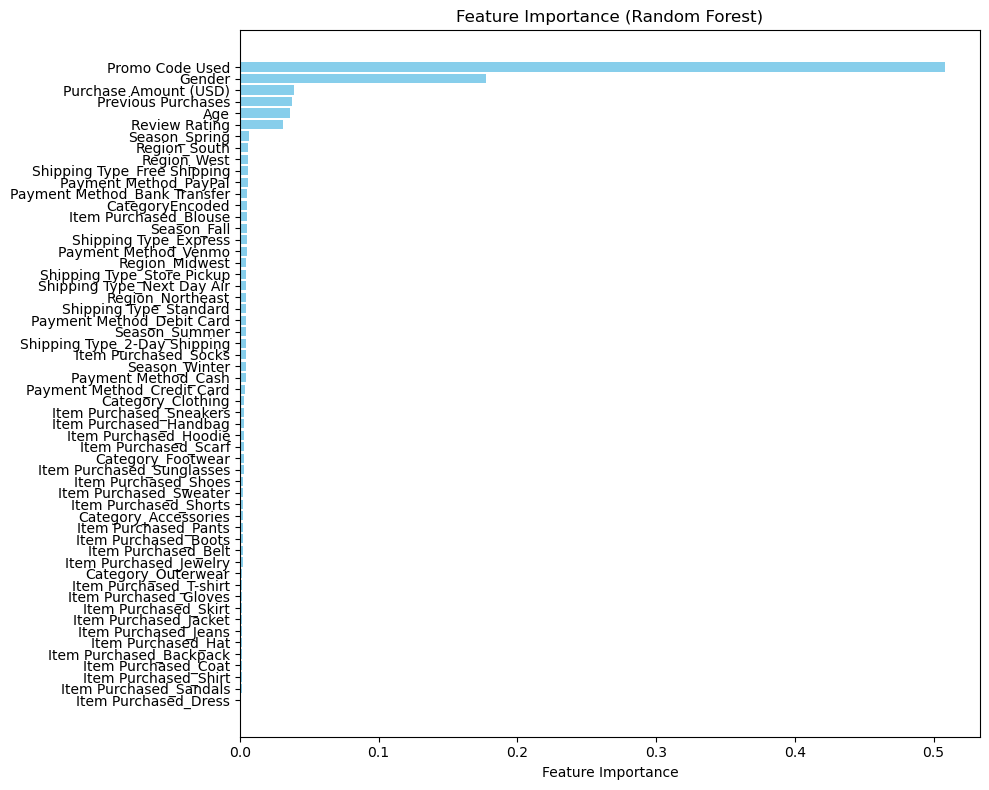

In [35]:
df_randomforest = df_predict.copy()

# Split features and target
X = df_randomforest.drop('Loyalty', axis=1)
y = df_randomforest['Loyalty']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Grid Search with Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Display best parameters and performance for the Random Forest model
print("Best parameters (Random Forest):", grid_search_rf.best_params_)
print("Best ROC AUC (Random Forest):", grid_search_rf.best_score_)
rf_best = grid_search_rf.best_estimator_

# Evaluate on Test Set (Threshold = 0.3)
y_probs_rf = rf_best.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred_rf = (y_probs_rf >= threshold).astype(int)
print(f"\nClassification Report (Random Forest, threshold={threshold}):")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix & ROC Curve for the Random Forest Model
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix (Random Forest)")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
axes[1].plot(fpr_rf, tpr_rf, label=f"AUC = {roc_auc_rf:.2f}")
axes[1].plot([0, 1], [0, 1], linestyle='--', color='red')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve (Random Forest)")
axes[1].legend()

plt.tight_layout()
plt.show()

# Feature Importance Bar Chart
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_best.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


The random forest model once again catches every loyal customer (100% recall) with zero missed cases, but its precision for loyal customers is only about 35%. That means more than half of the customers classified as “loyal” are false positives, creating a trade‐off between comprehensive detection and wasted outreach. Overall accuracy is 70%, with a solid ROC of about 0.84, showing decent overall separation between loyal and non‐loyal segments.<br>
Thus, while this is a noticeable improvement over a blind, one‐size‐fits‐all strategy, the low precision suggests further optimization is needed to reduce over‐targeting.

#### Q3.1 Why did you choose these models?

**Answer**<br>
Because the task is to identify loyal customers—defined as those who remain subscribed and purchase at least once every 30 days—we are dealing with a binary classification problem. Consequently, I chose **Logistic Regression**, known for its simplicity and interpretability, and **Random Forest**, a more complex ensemble method capable of capturing non‐linear relationships.

#### Q3.2 Which model would you choose to be deployed? Which metric did you consider in the decision? Why?
**Answer**<br>
I would choose to **deploy the Random Forest model** because it achieves a **higher recall (100%) for loyal customers**, ensuring that all truly loyal individuals are identified. The key metric I considered in this decision is **recall for the positive class (loyal customers)** since missing loyal customers could lead to missed marketing opportunities and revenue loss. While precision is lower, meaning some false positives occur, the trade-off is acceptable because it's better to target some additional non-loyal customers than to miss actual loyal ones. Additionally, the **Random Forest model has a higher ROC AUC (0.84–0.95 depending on tuning)** compared to Logistic Regression (which maxed out at **0.83**), indicating superior overall classification performance. Therefore, based on recall and AUC, **Random Forest is the best model for deployment.**

### Question 4
SmartRetail is looking to enhance its customer engagement and increase sales by moving away from static product suggestions toward a more dynamic and personalized approach. Given the available data, the company wants to explore how customer shopping behavior, purchase frequency, and spending patterns can be leveraged to make more relevant recommendations.

In [36]:
# Prepare recommendation dataset from the already loaded df_original
assert 'df_original' in globals(), "Dataset not loaded. Please run the loading cell above."
df_recommendation = df_original.copy()

In [37]:
df_recommendation['Gender'] = df_recommendation["Gender"].map({"Male": 1, "Female": 0})
df_recommendation['Discount Applied'] = df_recommendation["Discount Applied"].map({"Yes": 1, "No": 0})
df_recommendation['Promo Code Used'] = df_recommendation["Promo Code Used"].map({"Yes": 1, "No": 0})
df_recommendation['Subscription Status'] = df_recommendation["Subscription Status"].map({"Yes": 1, "No": 0})

In [38]:
# 2a) Define the US Census region mapping
region_mapping = {
    "Northeast": [
        "Connecticut", "Maine", "Massachusetts", "New Hampshire",
        "New Jersey", "New York", "Pennsylvania", "Rhode Island", "Vermont"
    ],
    "Midwest": [
        "Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota",
        "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin"
    ],
    "South": [
        "Alabama", "Arkansas", "Delaware", "Florida", "Georgia", "Kentucky",
        "Louisiana", "Maryland", "Mississippi", "North Carolina", "Oklahoma",
        "South Carolina", "Tennessee", "Virginia", "West Virginia", "Texas"
    ],
    "West": [
        "Alaska", "Arizona", "California", "Colorado", "Hawaii", "Idaho",
        "Montana", "Nevada", "New Mexico", "Oregon", "Utah", "Washington", "Wyoming"
    ]
}

# Create a dictionary that maps each state to its corresponding region
state_to_region = {
    state: region 
    for region, states in region_mapping.items() 
    for state in states
}

# 2b) Add a new column 'Region' based on 'Location'
df_recommendation['Region'] = df_recommendation['Location'].map(state_to_region)

In [39]:
df_recommendation.drop(columns=['Color', 'Size','Location','Promo Code Used'], inplace=True)

In [49]:
# Build recommendation data
# Load dataset copy prepared earlier
assert 'df_recommendation' in globals(), "Recommendation dataframe not prepared. Run previous cell."
df = df_recommendation.copy()

# Ensure Customer ID is always stored as an integer
df["Customer ID"] = df["Customer ID"].astype(int)

# Step 1: Encode Categorical Variables Using Label Encoding
categorical_cols = ['Region', 'Item Purchased', 'Season', 'Shipping Type', 'Payment Method', 'Category', 'Frequency of Purchases']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categorical values into numbers
    label_encoders[col] = le  # Store for future decoding if needed

# Step 2: Train-Validation-Test Split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Create a Customer-Item Interaction Matrix from full dataset
purchase_matrix = df.pivot_table(index="Customer ID", columns="Item Purchased", values="Previous Purchases", fill_value=0)
purchase_matrix.index = purchase_matrix.index.astype(int)  # Ensure index is integer
sparse_matrix = csr_matrix(purchase_matrix)

# Step 3: Apply SVD for Collaborative Filtering
svd = TruncatedSVD(n_components=20, random_state=42)
user_features = svd.fit_transform(sparse_matrix)
item_features = svd.components_

# Compute Item-Item Similarity (Collaborative Filtering)
item_similarity = cosine_similarity(item_features.T)
item_similarity_df = pd.DataFrame(item_similarity, index=purchase_matrix.columns, columns=purchase_matrix.columns)

# Step 4: Compute Content-Based Similarity on Categorical Features
item_attributes = df[['Item Purchased', 'Category', 'Season']].drop_duplicates(subset=['Item Purchased']).set_index('Item Purchased')
scaler = StandardScaler()
item_attributes_scaled = scaler.fit_transform(item_attributes)
content_similarity = cosine_similarity(item_attributes_scaled)
content_similarity_df = pd.DataFrame(content_similarity, index=item_attributes.index, columns=item_attributes.index)

# Align Matrices
df_similarity, item_similarity_df = content_similarity_df.align(item_similarity_df, fill_value=0)

# Step 5: Blend Collaborative & Content-Based Filtering
hybrid_similarity = (0.7 * item_similarity_df) + (0.3 * content_similarity_df)
np.fill_diagonal(hybrid_similarity.values, 1.0)

# Function to Recommend Items
def recommend_items_for_customer(customer_id, num_recommendations=5, min_similarity=0.005):
    if customer_id not in purchase_matrix.index:
        return f"Customer ID {customer_id} not found in dataset."
    
    purchased_items = purchase_matrix.loc[customer_id]
    purchased_items = purchased_items[purchased_items > 0].index.tolist()
    if not purchased_items:
        return f"Customer {customer_id} has no purchase history."

    recommendation_scores = pd.Series(dtype=float)
    for item in purchased_items:
        if item in hybrid_similarity.columns:
            recommendations = hybrid_similarity[item].sort_values(ascending=False)
            recommendation_scores = recommendation_scores.add(recommendations, fill_value=0)

    recommendation_scores = recommendation_scores.drop(purchased_items, errors="ignore")
    recommendation_scores = recommendation_scores[recommendation_scores > min_similarity]
    recommendation_scores = recommendation_scores.sort_values(ascending=False)

    while len(recommendation_scores) < num_recommendations and min_similarity > 0:
        min_similarity /= 2
        recommendation_scores = hybrid_similarity.mean(axis=1).sort_values(ascending=False)

    diverse_recommendations = []
    seen_categories = set()
    for item in recommendation_scores.index:
        category = df[df['Item Purchased'] == item]['Category'].values[0]
        if len(diverse_recommendations) < num_recommendations:
            diverse_recommendations.append((item, recommendation_scores[item]))
            seen_categories.add(category)

    recommended_items = pd.DataFrame(diverse_recommendations[:num_recommendations], columns=["Recommended Item", "Similarity Score"])
    recommended_items["Recommended Item"] = label_encoders['Item Purchased'].inverse_transform(recommended_items["Recommended Item"])
    return recommended_items

# Get Customer ID and Convert to Integer
customer_id = int(input("Insert Customer ID: "))

# Check if Customer Exists in Dataset Before Calling Function
if customer_id in df["Customer ID"].values:
    recommended_items = recommend_items_for_customer(customer_id, 5)
    print(f"\nRecommended items for Customer {customer_id}:")
    print(recommended_items.to_string(index=False))  # <-- converts DataFrame to string
else:
    print(f"Customer ID {customer_id} does not exist in dataset.")



Recommended items for Customer 2:
Recommended Item  Similarity Score
          Shorts          0.300000
          Blouse          0.300000
           Pants          0.300000
           Skirt          0.300000
        Backpack          0.151903


#### Q4.1
**How can SmartRetail develop a recommendation system that better aligns with customer purchasing behavior and preferences?**

**Answer**<br>
SmartRetail can implement a recommendation system by considering a personalized and adaptive to customer behavior. Instead of treating all purchases the same, it should prioritize frequently bought and recently purchased items to reflect real shopping habits.
Recommendations should also consider more factors, like region, preferred shipping method, and payment choices, to align with individual preferences.
Additionally, the system should balance relevance and variety—some customers prefer similar products, while others explore different categories. Adjusting recommendations accordingly will make them more useful and engaging.
By refining these areas, SmartRetail can provide smarter, more tailored suggestions that drive customer satisfaction and sales.

**What approach would you take to ensure recommendations are relevant and personalized? Justify your choice.**

**Answer**<br>To ensure recommendations are relevant and personalized, SmartRetail should focus on a hybrid approach that adapts to customer behavior. Instead of using a one-size-fits-all method, the system should prioritize frequently bought and recently purchased items, reflecting real shopping habits.
Additionally, recommendations should account for individual preferences, such as region, preferred shipping methods, and payment choices. This ensures that suggestions align with how each customer shops.
Balancing relevance and variety is also crucial. Some customers prefer similar products, while others explore different categories. The system should adjust recommendations accordingly to make them more engaging and useful.

#### Q4.2
How do you evaluate the model?

In [50]:
# 4.2 Evaluation (Category-level metrics with existing recommender)

K = 5  # top-K

# Build mapping from item name -> category name using original (non-encoded) data
item_to_category = (
    df_original[["Item Purchased", "Category"]]
    .drop_duplicates()
    .set_index("Item Purchased")["Category"]
)

# Build user -> (held_out item name, category name)
user_rows = df_original[["Customer ID", "Item Purchased", "Category"]].drop_duplicates()
user_holdout = {
    int(row["Customer ID"]): (row["Item Purchased"], row["Category"]) for _, row in user_rows.iterrows()
}

# Evaluate
hit_count = 0
precision_sum = 0.0
mrr_sum = 0.0
rmse_errors = []
users_evaluated = 0

def safe_get_categories(recommended_items_df):
    names = list(recommended_items_df["Recommended Item"])  # decoded names
    cats = []
    for n in names:
        if n in item_to_category.index:
            cats.append(item_to_category.loc[n])
        else:
            cats.append(None)
    return names, cats

for uid, (held_item, held_cat) in user_holdout.items():
    # Get recommendations from the existing recommender
    recs = recommend_items_for_customer(uid, num_recommendations=K)

    # Skip if no recs or wrong type
    if isinstance(recs, str) or recs is None or recs.empty:
        continue

    rec_names, rec_categories = safe_get_categories(recs)

    # Build relevance vector: same category as held-out item
    y_true = [1 if rc == held_cat else 0 for rc in rec_categories]
    y_pred = recs["Similarity Score"].values

    users_evaluated += 1
    precision_sum += (sum(y_true) / len(y_true)) if len(y_true) else 0.0
    if any(y_true):
        hit_count += 1
        # MRR@K for category match
        for rank, rel in enumerate(y_true, start=1):
            if rel == 1:
                mrr_sum += 1.0 / rank
                break
    # RMSE: similarity vs binary relevance
    if len(y_pred) == len(y_true) and len(y_pred) > 0:
        rmse_errors.append(mean_squared_error(y_true, y_pred))

if users_evaluated == 0:
    print("No users could be evaluated (no recommendations produced).")
else:
    avg_precision = precision_sum / users_evaluated
    hit_rate = hit_count / users_evaluated
    mrr = mrr_sum / users_evaluated
    rmse = float(np.sqrt(np.mean(rmse_errors))) if rmse_errors else 0.0

    print(f"Users evaluated: {users_evaluated}")
    print(f"Category Precision@{K}: {avg_precision:.4f}")
    print(f"Category Hit Rate@{K}: {hit_rate:.4f}")
    print(f"Category MRR@{K}: {mrr:.4f}")
    print(f"RMSE (Similarity vs Category relevance): {rmse:.4f}")


Users evaluated: 3900
Category Precision@5: 0.7221
Category Hit Rate@5: 0.9210
Category MRR@5: 0.8541
RMSE (Similarity vs Category relevance): 0.6181


The Category Precision@5 of 0.7221 shows that more than seventy percent of the recommended categories are relevant on average. This indicates that the system is making accurate suggestions within the top five.

The Category Hit Rate@5 of 0.9210 means that almost all users receive at least one correct category recommendation. This suggests that the system is broadly effective across the user base.

The Category Mean Reciprocal Rank of 0.8541 tells us that relevant categories usually appear very early in the list of recommendations, often in the first few positions. This makes the recommendations more practical and useful for users.

The RMSE of 0.6181 shows that the predicted similarity scores are fairly close to the actual relevance of categories. While there is still some difference between predicted and true preferences, the alignment is reasonably strong.

#### Q4.3
Please give two suggestions to improve the dataset in the context of the recommendations systems

- **1) Incorporate Contextual Factors**<br>
Right now, each customer has limited interactions, making collaborative filtering less effective. Tracking repeated purchases, time between purchases, and product preferences over time would create a richer dataset. This would allow the model to better understand evolving customer behavior and improve recommendation accuracy.

- **2) Incorporate Contextual Factors**<br>
The current model relies mainly on product attributes and purchase history. Adding time of purchase, seasonal trends, and price sensitivity could make recommendations more dynamic. For example, if a user frequently buys winter clothing in November, the model can prioritize similar products around that time.